In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

import matplotlib.pyplot as plt

# Lizard Project!

By: Katie Gosbee and Meagan Rittmanic

#### Question:
Which combination of the layers Styrofoam, epoxy, and soil would best insulate a lizard?

In [2]:
def make_system(Tenv, K1, K2, K3,depth, delta, dt, side_length):
    """Make a system object for the Lizard model.
    returns: System object
    """
    init = State(Lay1=0, Lay2=0, Lay3=0, L= 0)  
    
    t0 = 0
    t_end = 200*(1/dt) #in days
    dt = dt

    return System(init=init, t0=t0, t_end=t_end, 
                  Tenv=Tenv, K1=K1, K2=K2, K3=K3,
                  depth=depth, delta=delta, dt=dt, 
                  side_length=side_length)

#### Differential Equations:
###### dT/dt = kA(T1-T2)/d
We used this differential equation for the temperature change of a wall heating or cooling, making the assumption that the material was in the formation of a 6-walled cube.
With k = thermal conductivity of the layer, A being the surface area exposed, T1 being the temperature of the environment, T2 being the temperature of the layer, and d being the depth of the layer.
Source: physicsclassroom.com


In [3]:
def update_func(state, t, system):
    """Update the model.  
    returns: State ()     
    """
    unpack(system)
    lay1, lay2, lay3, l = state
   
    #The below four diff EQs represent the rate of heat changing 
    #between the outer layer to the inner layer(lizard)

    d1dt = K1*(side_length**3)*(Tenv-lay1)/depth      
    d2dt = K2*((side_length-.0127)**3)*(lay1-lay2)/depth
    d3dt = K3*((side_length-.0254)**3)*(lay2-lay3)/depth
    dLdt = ((side_length-.0381)**3)*0.5*(lay3-l)/(delta/2)
    
    
    lay1+= d1dt*dt #these update the changes in thermal energy of each layer
    lay2 += d2dt*dt
    lay3 += d3dt*dt
    l += dLdt*dt

    return State(Lay1=lay1, Lay2=lay2, Lay3=lay3, L=l)

In [4]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.     
    system: System object
    update_func: function that updates state    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    return frame.L, get_last_value(frame.L)

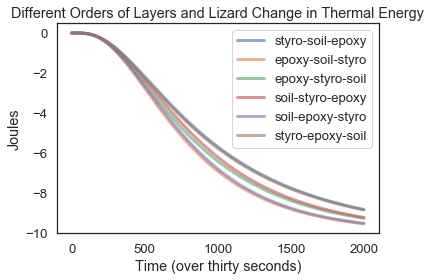

In [5]:
"""Each pair of three lines creates the function, runs the simulation with that particular function, and then plots the results
   Each function has a permutation of the three layers"""

system = make_system(-10, .35, .15, .03, .0127, .0762, 0.1, .2032) #.35 = epoxy
results, last1 = run_simulation(system, update_func)
plot(results, label = 'styro-soil-epoxy')

system = make_system(-10, .03, .15, .35, .0127, .0762, 0.1, .2032) #.03 = Polystyrene, expanded styrofoam
results, last2 = run_simulation(system, update_func)
plot(results, label = 'epoxy-soil-styro')

system = make_system(-10, .15, .03, .35, .0127, .0762, 0.1, .2032) #.15 = soil
results, last3 = run_simulation(system, update_func)
plot(results, label = 'epoxy-styro-soil')

system = make_system(-10, .35, .03, .15, .0127, .0762, 0.1, .2032)
results, last4 = run_simulation(system, update_func)
plot(results, label = 'soil-styro-epoxy')

system = make_system(-10, .03, .35, .15, .0127, .0762, 0.1, .2032)
results, last5 = run_simulation(system, update_func)
plot(results, label = 'soil-epoxy-styro')

system = make_system(-10, .15, .35, .03, .0127, .0762, 0.1, .2032)
results, last6 = run_simulation(system, update_func)
plot(results, label = 'styro-epoxy-soil')

decorate(xlabel='Time (over thirty seconds)',
         ylabel='Joules',
         title = 'Different Orders of Layers and Lizard Change in Thermal Energy')

In [6]:
dT = last1/(0.19*3762)

-0.012386659054871728

#### Results:
The order of layers that kept the lizard the most insulated after one year of running the simulation were, in order of the lizard to the environment, Styrofoam, with a thermal conductivity of 0.03 on the inside, soil, with a thermal conductivity of 0.15 in the middle, and epoxy, with a thermal conductivity of 0.35 on the outside.


#### Interpretation:
In this graph, we can see that, after the simulation has been run for 365 days, the order of layers that kept the lizard the best insulated were, in order of the lizard out to the environment, Styrofoam, soil, and epoxy. This simulation shows us, more generally, that, when given three layers of materials with differing thermal conductivities, the most insulating combination of the layers will be the one with the layer with the lowest specific heat on the inside, the middle layers on the inside (in ascending order), and the highest specific heat on the outside.


SyntaxError: invalid syntax (<ipython-input-7-d2263037044b>, line 1)